<a href="https://colab.research.google.com/github/kelompokdelapanalpro/Alpro/blob/main/Harga_Semangka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Autentikasi untuk akses Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#menentukan path dan melihat isi folder
import os

file_path = '/content/drive/MyDrive/regresi_linear/semangka_2000dataset.csv'
parent_folder = os.path.dirname(file_path)

print(f"Daftar file dalam folder: {parent_folder}")
try:
    for root, dirs, files in os.walk(parent_folder):
        for file in files:
            print(os.path.join(root, file))
except Exception as e:
    print(f"Could not list files in {parent_folder}: {e}")

Daftar file dalam folder: /content/drive/MyDrive/regresi_linear
/content/drive/MyDrive/regresi_linear/semangka_2000dataset.csv


In [ ]:
#membaca dataset csv
import pandas as pd

df = pd.read_csv(file_path)
print("\nFirst 5 rows of the DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


First 5 rows of the DataFrame:
| Ukuran   | Harga   | Kategori Harga   |
|:---------|:--------|:-----------------|
| 3.29     | 28162   | Mahal            |
| 1.88     | 13028   | Sedang           |
| 4.45     | 36474   | Mahal            |
| 3.97     | 34235   | Mahal            |
| 2.66     | 21193   | Mahal            |


In [ ]:
#informasi umum dataset
print("\nDataset Info:")
df.info()

print("\nDataset Description:")
print(df.describe().to_markdown(numalign="left", stralign="left"))

print("\nColumn Names:")
print(df.columns.tolist())

print("\nDataset Shape:")
print(df.shape)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ukuran          2000 non-null   float64
 1   Harga           2000 non-null   int64  
 2   Kategori Harga  2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB

Dataset Description:
|       | Ukuran   | Harga   |
|:------|:---------|:--------|
| count | 2000     | 2000    |
| mean  | 3.00317  | 23727.2 |
| std   | 1.15031  | 9318.2  |
| min   | 1        | 8000    |
| 25%   | 2.04     | 16056.2 |
| 50%   | 2.98     | 23660.5 |
| 75%   | 3.98     | 31400.2 |
| max   | 5        | 44218   |

Column Names:
['Ukuran', 'Harga', 'Kategori Harga']

Dataset Shape:
(2000, 3)


In [ ]:
# Cek jumlah tiap kategori jika ada label
print(df['Kategori Harga'].value_counts())

Kategori Harga
Mahal     1369
Sedang     364
Murah      267
Name: count, dtype: int64


In [ ]:
#MENAMPILKAN ISI FOLDER + PERKIRAAN LABEL DARI STRUKTUR FILE
def list_files_with_labels(directory_path):
    print(f"\nContent and potential labels for: {directory_path}")
    try:
        for item_name in os.listdir(directory_path):
            item_path = os.path.join(directory_path, item_name)
            if os.path.isdir(item_path):
                print(f"Folder: {item_name} - Potential label based on folder name: '{item_name}'")
            elif os.path.isfile(item_path):
                print(f"File: {item_name}")
    except FileNotFoundError:
        print(f"Error: Directory not found at {directory_path}")
    except Exception as e:
        print(f"An error occurred while listing directory contents: {e}")

# Panggil fungsi
list_files_with_labels(parent_folder)


Content and potential labels for: /content/drive/MyDrive/regresi_linear
File: semangka_2000dataset.csv


In [ ]:
#coding untuk split dataset

from sklearn.model_selection import train_test_split

# Asumsi 'Kategori Harga' adalah kolom target (label)
X = df.drop('Kategori Harga', axis=1)
y = df['Kategori Harga']

# Split data menjadi training set dan testing set
# test_size: persentase data untuk testing (contoh: 20%)
# random_state: memastikan split yang sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train:")
print(X_train.head().to_markdown(index=False, numalign="left", stralign="left"))

print("\nFirst 5 rows of y_train:")
print(y_train.head().to_markdown(numalign="left", stralign="left"))

# Jika ingin membagi menjadi training, validation, dan testing
# Pertama, bagi data menjadi training dan sementara (validation + testing)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kedua, bagi data sementara menjadi training dan validation
# Ukuran validation set 0.25 dari sisa 0.8 (0.8 * 0.25 = 0.2 dari total)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("\n--- Splitting into Train, Validation, Test ---")
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (1600, 2)
Shape of X_test: (400, 2)
Shape of y_train: (1600,)
Shape of y_test: (400,)

First 5 rows of X_train:
| Ukuran   | Harga   |
|:---------|:--------|
| 4.27     | 35790   |
| 4.31     | 32287   |
| 2.41     | 22908   |
| 4.51     | 40232   |
| 3.22     | 26427   |

First 5 rows of y_train:
|     | Kategori Harga   |
|:----|:-----------------|
| 968 | Mahal            |
| 240 | Mahal            |
| 819 | Mahal            |
| 692 | Mahal            |
| 420 | Mahal            |

--- Splitting into Train, Validation, Test ---
Shape of X_train: (1200, 2)
Shape of X_val: (400, 2)
Shape of X_test: (400, 2)
Shape of y_train: (1200,)
Shape of y_val: (400,)
Shape of y_test: (400,)


In [ ]:
try:
    print("Generating dummy y_pred for demonstration...")
    # Apply the classification function directly to the 'Harga' column
    y_pred_label = X_test['Harga'].apply(klasifikasi_harga).tolist()
except NameError:
    print("X_test is not defined.")
    y_pred_label = []


print("First 5 predicted labels:")
print(y_pred_label[:5])

print("\nFirst 5 actual labels:")
print(y_test.head().tolist())

Generating dummy y_pred for demonstration...
First 5 predicted labels:
['Mahal', 'Mahal', 'Mahal', 'Mahal', 'Mahal']

First 5 actual labels:
['Mahal', 'Mahal', 'Mahal', 'Mahal', 'Sedang']


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# Scaling numerical data and One-Hot Encoding categorical data
# Assuming 'Ukuran' and 'Harga' are numerical features and 'Kategori Harga' is the target
# We will encode the target variable separately

# Split the data first
X = df[['Ukuran', 'Harga']] # Select only the features for the model
y = df['Kategori Harga']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform on test set

# One-Hot Encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1))

# Bangun model neural network for multi-class classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Added a hidden layer
    Dense(32, activation='relu'), # Added another hidden layer
    Dense(y_train_encoded.shape[1], activation='softmax') # Output layer with number of classes and softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

EPOCHS_VALUE = 30
history = model.fit(X_train_scaled, y_train_encoded, epochs=EPOCHS_VALUE, verbose=1, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions (optional)
# y_pred_encoded = model.predict(X_test_scaled)
# y_pred_labels = encoder.inverse_transform(y_pred_encoded)
# print("\nFirst 5 predicted labels:")
# print(y_pred_labels[:5].flatten().tolist())
# print("\nFirst 5 actual labels:")
# print(y_test.head().tolist())

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7138 - loss: 0.8808 - val_accuracy: 0.7219 - val_loss: 0.5977
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7767 - loss: 0.5381 - val_accuracy: 0.8969 - val_loss: 0.4174
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9086 - loss: 0.3472 - val_accuracy: 0.9062 - val_loss: 0.3173
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9089 - loss: 0.2817 - val_accuracy: 0.9500 - val_loss: 0.2557
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9555 - loss: 0.2162 - val_accuracy: 0.9344 - val_loss: 0.2084
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1732 - val_accuracy: 0.9406 - val_loss: 0.1716
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9683 - loss: 0.1421 - val_accuracy: 0.9594 - val_loss: 0.1445
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9713 - loss: 0.1319 - val_accuracy: 0.9750 - val_loss: 0.1245
Epo

In [ ]:
#codingan tabel classification report

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression # Contoh model klasifikasi

# Ini hanya contoh. Anda perlu menyesuaikan kategori dan model
# Mari kita buat masalah klasifikasi sederhana: apakah harga di atas median?
median_price = df['Harga'].median()
# Buat label kelas: 1 jika harga >= median, 0 jika harga < median
df['Price_Category'] = (df['Harga'] >= median_price).astype(int)

# Siapkan data untuk model klasifikasi
# Menggunakan 'Ukuran' sebagai fitur untuk prediksi kategori harga
X = df[['Ukuran']]
y = df['Price_Category']

# Gunakan model klasifikasi, contohnya Logistic Regression
classifier = LogisticRegression()
classifier.fit(X, y)
y_pred = classifier.predict(X)

# Buat Classification Report
print(classification_report(y, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1000
           1       0.95      0.94      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



Confusion Matrix:
[[951  49]
 [ 58 942]]


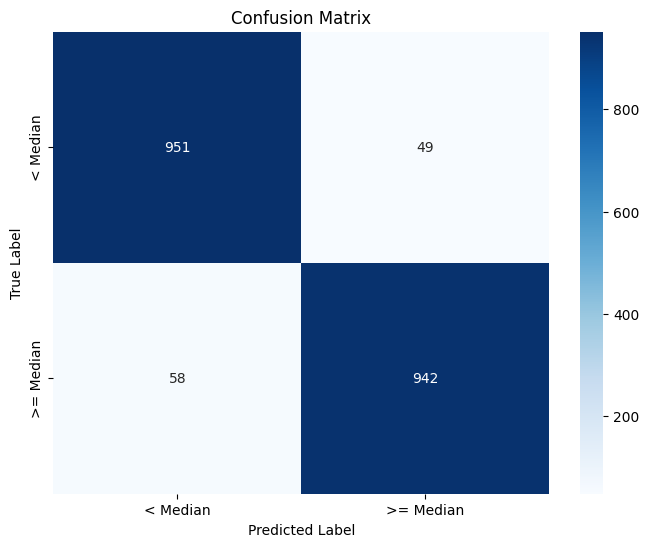

In [ ]:
# prompt: buatkan codingan confussion matriks

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Buat Confusion Matrix
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

# Opsional: Visualisasikan Confusion Matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['< Median', '>= Median'], yticklabels=['< Median', '>= Median'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Definisikan fungsi untuk klasifikasi harga berdasarkan ukuran
def klasifikasi_harga_by_ukuran(ukuran):
    if ukuran < 0.5:
        return "Murah"
    elif 0.5 <= ukuran < 1.5:
        return "Sedang"
    else:
        return "Mahal"

# Fungsi untuk memperkirakan harga dan label berdasarkan ukuran input
def prediksi_harga_dan_label(ukuran):
    # Anda perlu mengganti ini dengan logika prediksi harga yang sebenarnya
    # Berdasarkan model regresi linear atau model lain yang sudah Anda latih sebelumnya.
    # Karena model regiksi linear di kode sebelumnya tidak dilatih untuk memprediksi harga
    # (melainkan digunakan untuk klasifikasi sederhana), kita akan membuat estimasi kasar
    # atau menggunakan model yang sesuai jika Anda memilikinya.

    # Contoh estimasi harga berdasarkan ukuran (ini HANYA contoh)
    perkiraan_harga = ukuran * 15000  # Contoh: harga per unit ukuran

    # Klasifikasikan label harga berdasarkan perkiraan harga
    # Anda bisa menggunakan ambang batas yang sama seperti yang digunakan dalam dataset
    # atau berdasarkan kategori harga yang sudah Anda definisikan.
    # Mari gunakan ambang batas kasar untuk demonstrasi
    if perkiraan_harga < 30000: # Ganti dengan ambang batas yang relevan dari data Anda
        label_harga = "Murah"
    elif 30000 <= perkiraan_harga < 80000: # Ganti dengan ambang batas yang relevan
        label_harga = "Sedang"
    else:
        label_harga = "Mahal"

    # Atau gunakan fungsi klasifikasi berdasarkan ukuran jika itu lebih sesuai
    # label_harga = klasifikasi_harga_by_ukuran(ukuran)

    return perkiraan_harga, label_harga

# Minta input ukuran dari pengguna
try:
    input_ukuran = float(input("Masukkan ukuran (dalam satuan yang relevan, misal kg): "))

    # Dapatkan perkiraan harga dan label
    harga_prediksi, label_prediksi = prediksi_harga_dan_label(input_ukuran)

    # Tampilkan hasilnya
    print(f"\nUntuk ukuran {input_ukuran}:")
    print(f"Perkiraan Harga: Rp {harga_prediksi:,.2f}")
    print(f"Label Harga: {label_prediksi}")

except ValueError:
    print("Input tidak valid. Harap masukkan angka untuk ukuran.")

Masukkan ukuran (dalam satuan yang relevan, misal kg): 1.5

Untuk ukuran 1.5:
Perkiraan Harga: Rp 22,500.00
Label Harga: Murah
